In [ ]:
import os
import shapely
import numpy as np
import sys 
import pandas as pd 
import gc
from shapely import wkt
from matplotlib import pyplot as plt
from shapely.geometry import Point,mapping,Polygon,box,MultiPoint
import geopandas as gpd 
import seaborn as sns 
 
# for parallelization
sys.path.append('/mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/APT-Realignment/src/apt_realignment')
from process_geometries import ProcessGeometricData  as ProcessAPT_data
from utils.haversine_distance import get_distance

def save_geometry(dataframe,geometry,out_path,fname='dataframe.geojson'):
    df_to_save = gpd.GeoDataFrame(geometry=dataframe[geometry],crs="EPSG:4326")
    df_to_save = df_to_save.to_crs("epsg:4326")
    df_to_save.to_file(os.path.join(out_path,fname),driver="GeoJSON")

## Santa Clara California 

In [ ]:
data_path  = "/mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/BFP_Analysis_USA/data/data"
state = "California"
city = "SantaClara"
apt_data_path = os.path.join(data_path,state,"APT_2022_06_012_nam_usa_uca.shp" )
parcel_path = os.path.join(data_path,state,city,"Parcels_06085/Parcels_06085.shp")
building_geojson = os.path.join(data_path,state,'California.geojson')

## Read APT data From MNR Database 

In [ ]:
apt_df = gpd.read_file(apt_data_path)
apt_df = gpd.GeoDataFrame(apt_df,crs="EPSG:4326",geometry='geometry')
apt_df = apt_df.to_crs("epsg:4326")
print("Total number of data points collected from MNR database ",apt_df.shape[0])
gc.collect()
apt_df.head()

# sns.countplot(apt_df['AnchorPoin'])
# print(apt_df['AnchorPoin'].value_counts())

# print("Building Address Points :{}".format(apt_df['AnchorPoin'].value_counts()[0] /apt_df['AnchorPoin'].count()))
# print("Address Parcel  Centroid Points:{}".format(apt_df['AnchorPoin'].value_counts()[1] /apt_df['AnchorPoin'].count() ))

## Read State Building Footprint Data

In [ ]:
# Read MIcrosoft data 
print("reading :",os.path.basename(building_geojson))
footprint_df = gpd.read_file(building_geojson)
footprint_df = gpd.GeoDataFrame(footprint_df, crs="EPSG:4326", geometry='geometry')
print("Building CRS:",footprint_df.crs)

gc.collect()
footprint_df.head()

## Read Parcel Data specific to County

In [ ]:
# read Parcel data
parcel_df = gpd.read_file(parcel_path)
parcel_df = gpd.GeoDataFrame(parcel_df,crs="EPSG:4326",geometry='geometry')
# convert parcel crs to same as building fooprint
parcel_df = parcel_df.to_crs("epsg:4326")
parcel_polygon_changedcrs_df = gpd.GeoDataFrame(geometry=parcel_df['geometry'])

print("CRS after conversion: ",parcel_df.crs)
print("Parcel Data Points :",parcel_df.shape[0])
# parcel_polygon_changedcrs_df.to_file(os.path.join(out_path,"parcel_DistrictofColumbia.geojson"), driver="GeoJSON")
gc.collect()

parcel_df.head(10)

## Process Data 

In [3]:
apt_preprocess = ProcessAPT_data(parcel_shapefile=parcel_path,building_shapefile=building_geojson,apt_shape_file=apt_data_path)
processed_df = apt_preprocess.process_dataframe(bfp_count_per_parcel=1)
processed_df.head(10)

2022-08-17 08:28:13,118:INFO:- Generating Parcel BFP matrix for 1 BFP within Parcel
2022-08-17 08:28:13,815:INFO:- Processing Anchor-Points data over Parcel-Building Geo-Dataframe


,APN,FIPS,PRCLDMPID,geometry,building_geometry,building_roi,updated_geometries,feat_id,iso_script,iso_lang_c,...,state_prov,locality,street_nam,country_co,prefix,suffix,predir,postdir,sn_body,APT
0,02604077,06085,100660192_176972561,"POLYGON ((-121.90983 37.46205, -121.90995 37.4...","POLYGON ((-121.909855 37.462099, -121.909799 3...","POLYGON ((-121.90985 37.46210, -121.90980 37.4...",POINT (-121.90982 37.46220),00005543-3300-2800-0000-0000006538d6,Latn,ENG,...,CA,Milpitas,Buskirk St,USA,None,St,None,None,Buskirk,POINT (-121.90974 37.462187)
2,02604074,06085,100660192_176972563,"POLYGON ((-121.91049 37.46181, -121.91059 37.4...","POLYGON ((-121.910477 37.461879, -121.910327 3...","POLYGON ((-121.91048 37.46188, -121.91033 37.4...",POINT (-121.91043 37.46197),00005543-3300-2800-0000-0000006538ce,Latn,ENG,...,CA,Milpitas,Buskirk St,USA,None,St,None,None,Buskirk,POINT (-121.910396 37.461946)
3,02604076,06085,100660192_176972560,"POLYGON ((-121.91003 37.46196, -121.91016 37.4...","POLYGON ((-121.909917 37.462073, -121.909991 3...","POLYGON ((-121.90992 37.46207, -121.90999 37.4...",POINT (-121.91003 37.46212),00005543-3300-2800-0000-0000006538d2,Latn,ENG,...,CA,Milpitas,Buskirk St,USA,None,St,None,None,Buskirk,POINT (-121.909937 37.462111)
4,02604118,06085,100660192_176972559,"POLYGON ((-121.91099 37.46168, -121.91108 37.4...","POLYGON ((-121.91099 37.46179, -121.910947 37....","POLYGON ((-121.91099 37.46179, -121.91095 37.4...",POINT (-121.91089 37.46183),00005543-3300-2800-0000-0000006538ae,Latn,ENG,...,CA,Milpitas,Arizona Ave,USA,None,Ave,None,None,Arizona,POINT (-121.910822 37.461753)
4,02604118,06085,100660192_176972559,"POLYGON ((-121.91099 37.46168, -121.91108 37.4...","POLYGON ((-121.91099 37.46179, -121.910947 37....","POLYGON ((-121.91099 37.46179, -121.91095 37.4...",POINT (-121.91089 37.46183),00005543-3300-2800-0000-0000006538af,Latn,ENG,...,CA,Milpitas,Arizona Ave,USA,None,Ave,None,None,Arizona,POINT (-121.910867 37.461848)
5,02604117,06085,100660192_176972558,"POLYGON ((-121.91108 37.46184, -121.91121 37.4...","POLYGON ((-121.911102 37.461992, -121.911055 3...","POLYGON ((-121.91110 37.46199, -121.91106 37.4...",POINT (-121.91100 37.46196),00005543-3300-2800-0000-0000006538b0,Latn,ENG,...,CA,Milpitas,Arizona Ave,USA,None,Ave,None,None,Arizona,POINT (-121.910863 37.461969)
9,02604111,06085,100660192_176972554,"POLYGON ((-121.91007 37.46238, -121.91019 37.4...","POLYGON ((-121.910145 37.462557, -121.910088 3...","POLYGON ((-121.91014 37.46256, -121.91009 37.4...",POINT (-121.91004 37.46254),00005543-3300-2800-0000-0000006538d7,Latn,ENG,...,CA,Milpitas,Buskirk St,USA,None,St,None,None,Buskirk,POINT (-121.909939 37.46244)
22,12733047,06085,100660192_176981944,"POLYGON ((-122.12667 37.43620, -122.12682 37.4...","POLYGON ((-122.126641 37.436455, -122.126621 3...","POLYGON ((-122.12664 37.43646, -122.12662 37.4...",POINT (-122.12660 37.43640),00005543-3300-2800-0000-00000064c95f,Latn,ENG,...,CA,Palo Alto,Marshall Dr,USA,None,Dr,None,None,Marshall,POINT (-122.126565 37.436412)
23,12728031,06085,100660192_176981943,"POLYGON ((-122.12615 37.43644, -122.12616 37.4...","POLYGON ((-122.126161 37.436579, -122.126077 3...","POLYGON ((-122.12616 37.43658, -122.12608 37.4...",POINT (-122.12619 37.43664),00005543-3300-2800-0000-00000064c965,Latn,ENG,...,CA,Palo Alto,Bruce Dr,USA,None,Dr,None,None,Bruce,POINT (-122.1261 37.436642)
25,12728100,06085,100660192_176981941,"POLYGON ((-122.12410 37.43651, -122.12438 37.4...","POLYGON ((-122.124034 37.436644, -122.124144 3...","POLYGON ((-122.12403 37.43664, -122.12414 37.4...",POINT (-122.12415 37.43668),00005543-3300-2800-0000-00000064e160,Latn,ENG,...,CA,Palo Alto,Sycamore Dr,USA,None,Dr,None,None,Sycamore,POINT (-122.124145 37.436708)


In [4]:
def get_apt_to_bfp_distance(data):
    anchor_point = data['APT']
    bfp_centroid = data['updated_geometries']
    return get_distance(anchor_point, bfp_centroid)

processed_df['APT_to_Centroid_distance'] = processed_df.apply(lambda x: get_apt_to_bfp_distance(x),axis=1)

processed_df['APT_lat'] = processed_df['APT'].apply(lambda z: z.y)
processed_df['APT_lon'] = processed_df['APT'].apply(lambda z: z.x)

processed_df['updated_lat'] = processed_df['updated_geometries'].apply(lambda z: z.y)
processed_df['updated_lon'] = processed_df['updated_geometries'].apply(lambda z: z.x)
processed_df.head()

,APN,FIPS,PRCLDMPID,geometry,building_geometry,building_roi,updated_geometries,feat_id,iso_script,iso_lang_c,...,suffix,predir,postdir,sn_body,APT,APT_to_Centroid_distance,APT_lat,APT_lon,updated_lat,updated_lon
0,02604077,06085,100660192_176972561,"POLYGON ((-121.90983 37.46205, -121.90995 37.4...","POLYGON ((-121.909855 37.462099, -121.909799 3...","POLYGON ((-121.90985 37.46210, -121.90980 37.4...",POINT (-121.90982 37.46220),00005543-3300-2800-0000-0000006538d6,Latn,ENG,...,St,None,None,Buskirk,POINT (-121.90974 37.462187),7.1,37.462187,-121.909740,37.462196,-121.909821
2,02604074,06085,100660192_176972563,"POLYGON ((-121.91049 37.46181, -121.91059 37.4...","POLYGON ((-121.910477 37.461879, -121.910327 3...","POLYGON ((-121.91048 37.46188, -121.91033 37.4...",POINT (-121.91043 37.46197),00005543-3300-2800-0000-0000006538ce,Latn,ENG,...,St,None,None,Buskirk,POINT (-121.910396 37.461946),4.2,37.461946,-121.910396,37.461972,-121.910432
3,02604076,06085,100660192_176972560,"POLYGON ((-121.91003 37.46196, -121.91016 37.4...","POLYGON ((-121.909917 37.462073, -121.909991 3...","POLYGON ((-121.90992 37.46207, -121.90999 37.4...",POINT (-121.91003 37.46212),00005543-3300-2800-0000-0000006538d2,Latn,ENG,...,St,None,None,Buskirk,POINT (-121.909937 37.462111),8.2,37.462111,-121.909937,37.462120,-121.910030
4,02604118,06085,100660192_176972559,"POLYGON ((-121.91099 37.46168, -121.91108 37.4...","POLYGON ((-121.91099 37.46179, -121.910947 37....","POLYGON ((-121.91099 37.46179, -121.91095 37.4...",POINT (-121.91089 37.46183),00005543-3300-2800-0000-0000006538ae,Latn,ENG,...,Ave,None,None,Arizona,POINT (-121.910822 37.461753),10.5,37.461753,-121.910822,37.461828,-121.910895
4,02604118,06085,100660192_176972559,"POLYGON ((-121.91099 37.46168, -121.91108 37.4...","POLYGON ((-121.91099 37.46179, -121.910947 37....","POLYGON ((-121.91099 37.46179, -121.91095 37.4...",POINT (-121.91089 37.46183),00005543-3300-2800-0000-0000006538af,Latn,ENG,...,Ave,None,None,Arizona,POINT (-121.910867 37.461848),3.2,37.461848,-121.910867,37.461828,-121.910895


In [ ]:
# out_path = os.path.join(data_path,city)
# save_geometry(processed_df,geometry='updated_geometries',out_path=out_path,fname='APT_usa_uca_updated_gemotries.geojson')
# save_geometry(processed_df,geometry='APT',out_path=out_path,fname='APT_usa_uca.geojson')
# save_geometry(processed_df,geometry='building_geometry',out_path=out_path,fname='building_roi_usa_ua.geojson')

In [5]:
distance_greater_than_50m = processed_df.loc[processed_df['APT_to_Centroid_distance']>50].shape[0]
max_dist = processed_df['APT_to_Centroid_distance'].loc[processed_df['APT_to_Centroid_distance']>50].max()
print("Max distance APT from Parcel to Building Centroid {:.2f} m".format(processed_df['APT_to_Centroid_distance'].loc[processed_df['APT_to_Centroid_distance']>50].max()))
print("Data points greater than 50m: {:.2f}% ".format(100*(distance_greater_than_50m/processed_df.shape[0])))

Max distance APT from Parcel to Building Centroid 1163.10 m
Data points greater than 50m: 0.31% 


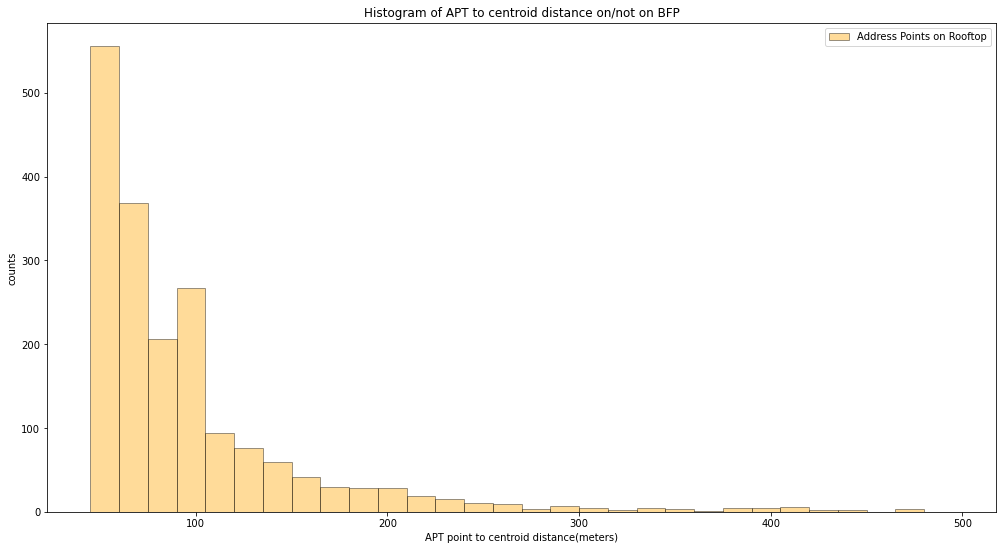

21

In [6]:
fig, ax = plt.subplots(figsize=(17,9))

ax.set_title("Histogram of APT to centroid distance on/not on BFP")
ax.set_xlabel("APT point to centroid distance(meters)")
ax.set_ylabel("counts")

frqTrue, edgesTrue = np.histogram(processed_df['APT_to_Centroid_distance'].loc[processed_df['APT_to_Centroid_distance']>50].values, bins = np.arange(45,500,15))
p1 = ax.bar(edgesTrue[:-1], frqTrue, width=np.diff(edgesTrue), edgecolor="black", align="edge",alpha=0.4,label='Address Points on Rooftop',color='orange')

plt.legend()
plt.show()
gc.collect()

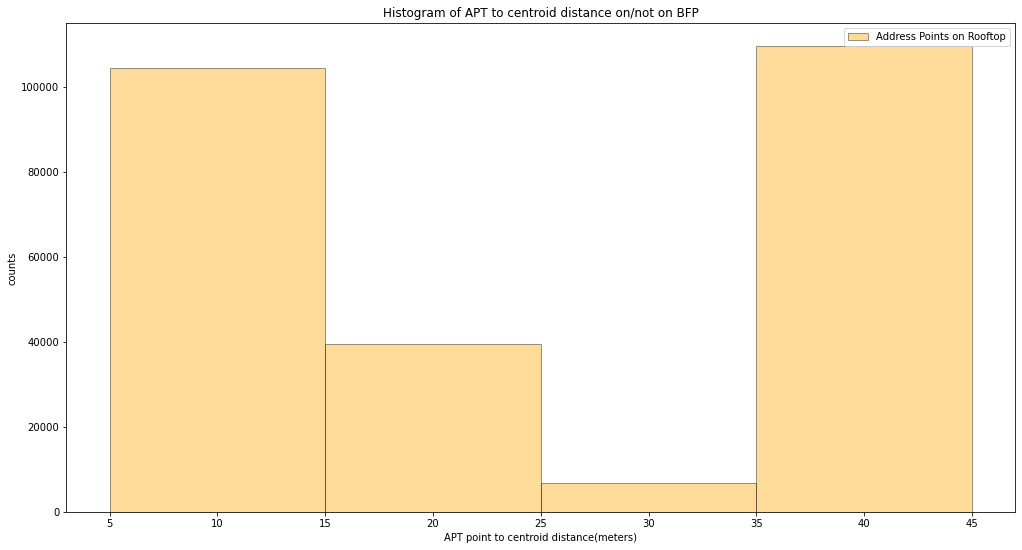

4642

In [7]:
fig, ax = plt.subplots(figsize=(17,9))

ax.set_title("Histogram of APT to centroid distance on/not on BFP")
ax.set_xlabel("APT point to centroid distance(meters)")
ax.set_ylabel("counts")

frqTrue, edgesTrue = np.histogram(processed_df['APT_to_Centroid_distance'].loc[processed_df['APT_to_Centroid_distance']<50].values, bins = np.arange(5,50,10))
p1 = ax.bar(edgesTrue[:-1], frqTrue, width=np.diff(edgesTrue), edgecolor="black", align="edge",alpha=0.4,label='Address Points on Rooftop',color='orange')

plt.legend()
plt.show()
gc.collect()

In [8]:
df_for_analysis_usa_co_arapahoe = processed_df.drop(['APN','FIPS','PRCLDMPID','geometry','building_geometry','building_roi','APT'],axis=1)
df_for_analysis_usa_co_arapahoe.head()

,updated_geometries,feat_id,iso_script,iso_lang_c,postal_cod,house_numb,state_prov,locality,street_nam,country_co,prefix,suffix,predir,postdir,sn_body,APT_to_Centroid_distance,APT_lat,APT_lon,updated_lat,updated_lon
0,POINT (-121.90982 37.46220),00005543-3300-2800-0000-0000006538d6,Latn,ENG,95035,154,CA,Milpitas,Buskirk St,USA,None,St,None,None,Buskirk,7.1,37.462187,-121.909740,37.462196,-121.909821
2,POINT (-121.91043 37.46197),00005543-3300-2800-0000-0000006538ce,Latn,ENG,95035,118,CA,Milpitas,Buskirk St,USA,None,St,None,None,Buskirk,4.2,37.461946,-121.910396,37.461972,-121.910432
3,POINT (-121.91003 37.46212),00005543-3300-2800-0000-0000006538d2,Latn,ENG,95035,142,CA,Milpitas,Buskirk St,USA,None,St,None,None,Buskirk,8.2,37.462111,-121.909937,37.462120,-121.910030
4,POINT (-121.91089 37.46183),00005543-3300-2800-0000-0000006538ae,Latn,ENG,95035,2123,CA,Milpitas,Arizona Ave,USA,None,Ave,None,None,Arizona,10.5,37.461753,-121.910822,37.461828,-121.910895
4,POINT (-121.91089 37.46183),00005543-3300-2800-0000-0000006538af,Latn,ENG,95035,2135,CA,Milpitas,Arizona Ave,USA,None,Ave,None,None,Arizona,3.2,37.461848,-121.910867,37.461828,-121.910895


In [9]:
output_path = os.path.join(data_path,state,city,'01_apt_realignment_mapping')
if not os.path.isdir(output_path):
    os.makedirs(output_path)
print(output_path)

filename = os.path.join(output_path,'APT_realigned_usa_uca_SC')
geo_dataframe = gpd.GeoDataFrame(df_for_analysis_usa_co_arapahoe, geometry='updated_geometries', crs="EPSG:4326")
pd_dataframe = pd.DataFrame(geo_dataframe)

pd_dataframe.to_pickle(filename+'.pkl')
geo_dataframe.to_file(driver='ESRI Shapefile', filename=filename+'.shp')


/mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/BFP_Analysis_USA/data/data/California/SantaClara/01_apt_realignment_mapping


## Araphoe Colarado  

In [10]:
import os
import shapely
import numpy as np
import sys 
import pycoredb 
import pandas as pd 
import gc
from shapely import wkt
from matplotlib import pyplot as plt
from shapely.geometry import Point,mapping,Polygon,box,MultiPoint
import geopandas as gpd 
import seaborn as sns 
 
# for parallelization
sys.path.append('/mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/APT-Realignment/src/apt_realignment')
sys.path.append('/mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/APT-Realignment/src/apt_realignment/utils')
from process_geometries import ProcessGeometricData  as ProcessAPT_data
from utils.haversine_distance import get_distance
from utils.extract_mnr_data import ExtractMNRData as extract_mnr_data

data_path  = "/mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/BFP_Analysis_USA/data/data"
state = "Colorado"
city = "Arapahoe"
apt_data_path = os.path.join(data_path,state,"APT_2022_06_012_nam_usa_uco.shp" )
parcel_path = os.path.join(data_path,state,city,"Parcels_08005/Parcels_08005.shp")
building_geojson = os.path.join(data_path,state,'Colorado.geojson')

In [11]:
# if os.path.isfile(parcel_path):
#     mnr_database = extract_mnr_data(country_code='_2022_06_010_nam_usa_uco')
#     mnr_database.connect_to_server()
#     # out_path = os.path.join(data_path,state)
#     # mnr_apt_df = mnr_database.extract_apt_addresses_data()
#     # mnr_database.save_dataframe_as_shpfile(mnr_apt_df, out_path, filename='APT_2022_06_009_nam_usa_uco.shp')

gc.collect()

6

In [12]:
apt_preprocess = ProcessAPT_data(parcel_shapefile=parcel_path,building_shapefile=building_geojson,apt_shape_file=apt_data_path)
processed_df_co = apt_preprocess.process_dataframe(bfp_count_per_parcel=1)
processed_df_co.head(10)

2022-08-17 08:54:40,580:INFO:- Creating Realignment-matrix for APT's
2022-08-17 08:54:40,583:INFO:- Processing Land Parcel data and Building Footprints 
2022-08-17 08:57:10,448:INFO:- Generating Parcel BFP matrix for 1 BFP within Parcel
2022-08-17 08:57:10,914:INFO:- Processing Anchor-Points data over Parcel-Building Geo-Dataframe


,APN,FIPS,PRCLDMPID,geometry,building_geometry,building_roi,updated_geometries,feat_id,iso_script,iso_lang_c,...,state_prov,locality,street_nam,country_co,prefix,suffix,predir,postdir,sn_body,APT
0,1971-35-3-23-043,08005,100660192_205096966,"POLYGON ((-104.97765 39.65356, -104.97826 39.6...","POLYGON ((-104.978111 39.653896, -104.978114 3...","POLYGON ((-104.97769 39.65356, -104.97811 39.6...",POINT (-104.97790 39.65364),00004358-3100-2800-0000-00000003efbe,Latn,ENG,...,CO,Englewood,S Clarkson St,USA,None,St,S,None,Clarkson,POINT (-104.977889 39.653629)
1,1971-35-3-23-044,08005,100660192_205096967,"POLYGON ((-104.97765 39.65336, -104.97826 39.6...","POLYGON ((-104.978111 39.653896, -104.978114 3...","POLYGON ((-104.97769 39.65336, -104.97811 39.6...",POINT (-104.97790 39.65347),00004358-3100-2800-0000-00000003efbd,Latn,ENG,...,CO,Englewood,S Clarkson St,USA,None,St,S,None,Clarkson,POINT (-104.977889 39.65346)
2,1971-35-3-23-045,08005,100660192_205096968,"POLYGON ((-104.97765 39.65322, -104.97826 39.6...","POLYGON ((-104.978111 39.653896, -104.978114 3...","POLYGON ((-104.97811 39.65336, -104.97769 39.6...",POINT (-104.97789 39.65333),00004358-3100-2800-0000-00000003efbc,Latn,ENG,...,CO,Englewood,S Clarkson St,USA,None,St,S,None,Clarkson,POINT (-104.977892 39.653288)
3,1971-35-3-23-032,08005,100660192_205096969,"POLYGON ((-104.97765 39.65322, -104.97765 39.6...","POLYGON ((-104.977599 39.653904, -104.977604 3...","POLYGON ((-104.97760 39.65364, -104.97716 39.6...",POINT (-104.97738 39.65345),00004358-3100-2800-0000-00000003efd5,Latn,ENG,...,CO,Englewood,Hampden Ave,USA,None,Ave,None,None,Hampden,POINT (-104.977386 39.653425)
4,1971-35-3-23-042,08005,100660192_205096965,"POLYGON ((-104.97765 39.65370, -104.97826 39.6...","POLYGON ((-104.978111 39.653896, -104.978114 3...","POLYGON ((-104.97769 39.65370, -104.97811 39.6...",POINT (-104.97790 39.65377),00004358-3100-2800-0000-00000003efbf,Latn,ENG,...,CO,Englewood,S Clarkson St,USA,None,St,S,None,Clarkson,POINT (-104.97789 39.653767)
5,1971-35-3-23-041,08005,100660192_205096964,"POLYGON ((-104.97765 39.65384, -104.97826 39.6...","POLYGON ((-104.978111 39.653896, -104.978114 3...","POLYGON ((-104.97769 39.65384, -104.97811 39.6...",POINT (-104.97790 39.65389),00004358-3100-2800-0000-00000003efc0,Latn,ENG,...,CO,Englewood,S Clarkson St,USA,None,St,S,None,Clarkson,POINT (-104.977888 39.653908)
7,1971-35-3-24-015,08005,100660192_205096956,"POLYGON ((-104.97636 39.65415, -104.97692 39.6...","POLYGON ((-104.976447 39.654674, -104.976592 3...","POLYGON ((-104.97645 39.65467, -104.97659 39.6...",POINT (-104.97663 39.65445),00004358-3100-2800-0000-00000003f051,Latn,ENG,...,CO,Englewood,S Emerson St,USA,None,St,S,None,Emerson,POINT (-104.976653 39.654503)
11,1971-35-3-20-005,08005,100660192_205096945,"POLYGON ((-104.97531 39.65584, -104.97576 39.6...","POLYGON ((-104.975564 39.655855, -104.975565 3...","POLYGON ((-104.97556 39.65586, -104.97557 39.6...",POINT (-104.97562 39.65591),00004358-3100-2800-0000-00000003f0d0,Latn,ENG,...,CO,Englewood,S Ogden St,USA,None,St,S,None,Ogden,POINT (-104.9756031 39.6559106)
12,1971-34-4-00-057,08005,100660192_205096963,"POLYGON ((-104.97902 39.65323, -104.97902 39.6...","POLYGON ((-104.978445 39.65328, -104.978445 39...","POLYGON ((-104.97844 39.65328, -104.97844 39.6...",POINT (-104.97870 39.65350),00004358-3100-2800-0000-00000003efbb,Latn,ENG,...,CO,Englewood,Hampden Ave,USA,None,Ave,None,None,Hampden,POINT (-104.978684 39.653433)
13,1971-34-4-00-052,08005,100660192_205096962,"POLYGON ((-104.97969 39.65323, -104.97969 39.6...","POLYGON ((-104.979094 39.653342, -104.979093 3...","POLYGON ((-104.97909 39.65334, -104.97909 39.6...",POINT (-104.97933 39.65351),00004358-3100-2800-0000-00000003efba,Latn,ENG,...,CO,Englewood,Hampden Ave,USA,None,Ave,None,None,Hampden,POINT (-104.979344 39.653476)


In [13]:
def get_apt_to_bfp_distance(data):
    anchor_point = data['APT']
    bfp_centroid = data['updated_geometries']
    return get_distance(anchor_point, bfp_centroid)

processed_df_co['APT_to_Centroid_distance'] = processed_df_co.apply(lambda x: get_apt_to_bfp_distance(x),axis=1)
processed_df_co['APT_lat'] = processed_df_co['APT'].apply(lambda z: z.y)
processed_df_co['APT_lon'] = processed_df_co['APT'].apply(lambda z: z.x)

processed_df_co['updated_lat'] = processed_df_co['updated_geometries'].apply(lambda z: z.y)
processed_df_co['updated_lon'] = processed_df_co['updated_geometries'].apply(lambda z: z.x)
processed_df_co.head()

,APN,FIPS,PRCLDMPID,geometry,building_geometry,building_roi,updated_geometries,feat_id,iso_script,iso_lang_c,...,suffix,predir,postdir,sn_body,APT,APT_to_Centroid_distance,APT_lat,APT_lon,updated_lat,updated_lon
0,1971-35-3-23-043,08005,100660192_205096966,"POLYGON ((-104.97765 39.65356, -104.97826 39.6...","POLYGON ((-104.978111 39.653896, -104.978114 3...","POLYGON ((-104.97769 39.65356, -104.97811 39.6...",POINT (-104.97790 39.65364),00004358-3100-2800-0000-00000003efbe,Latn,ENG,...,St,S,None,Clarkson,POINT (-104.977889 39.653629),1.2,39.653629,-104.977889,39.653636,-104.977900
1,1971-35-3-23-044,08005,100660192_205096967,"POLYGON ((-104.97765 39.65336, -104.97826 39.6...","POLYGON ((-104.978111 39.653896, -104.978114 3...","POLYGON ((-104.97769 39.65336, -104.97811 39.6...",POINT (-104.97790 39.65347),00004358-3100-2800-0000-00000003efbd,Latn,ENG,...,St,S,None,Clarkson,POINT (-104.977889 39.65346),1.2,39.653460,-104.977889,39.653465,-104.977902
2,1971-35-3-23-045,08005,100660192_205096968,"POLYGON ((-104.97765 39.65322, -104.97826 39.6...","POLYGON ((-104.978111 39.653896, -104.978114 3...","POLYGON ((-104.97811 39.65336, -104.97769 39.6...",POINT (-104.97789 39.65333),00004358-3100-2800-0000-00000003efbc,Latn,ENG,...,St,S,None,Clarkson,POINT (-104.977892 39.653288),4.2,39.653288,-104.977892,39.653326,-104.977892
3,1971-35-3-23-032,08005,100660192_205096969,"POLYGON ((-104.97765 39.65322, -104.97765 39.6...","POLYGON ((-104.977599 39.653904, -104.977604 3...","POLYGON ((-104.97760 39.65364, -104.97716 39.6...",POINT (-104.97738 39.65345),00004358-3100-2800-0000-00000003efd5,Latn,ENG,...,Ave,None,None,Hampden,POINT (-104.977386 39.653425),2.6,39.653425,-104.977386,39.653449,-104.977383
4,1971-35-3-23-042,08005,100660192_205096965,"POLYGON ((-104.97765 39.65370, -104.97826 39.6...","POLYGON ((-104.978111 39.653896, -104.978114 3...","POLYGON ((-104.97769 39.65370, -104.97811 39.6...",POINT (-104.97790 39.65377),00004358-3100-2800-0000-00000003efbf,Latn,ENG,...,St,S,None,Clarkson,POINT (-104.97789 39.653767),1.1,39.653767,-104.977890,39.653774,-104.977899


In [14]:
distance_greater_than_50m = processed_df_co.loc[processed_df_co['APT_to_Centroid_distance']>50].shape[0]
max_dist = processed_df_co['APT_to_Centroid_distance'].loc[processed_df_co['APT_to_Centroid_distance']>50].max()
print("Max distance APT from Parcel to Building Centroid {:.2f} m".format(processed_df_co['APT_to_Centroid_distance'].loc[processed_df_co['APT_to_Centroid_distance']>50].max()))
print("Data points greater than 50m: {:.2f}% ".format(100*(distance_greater_than_50m/processed_df_co.shape[0])))

Max distance APT from Parcel to Building Centroid 1076.50 m
Data points greater than 50m: 0.72% 


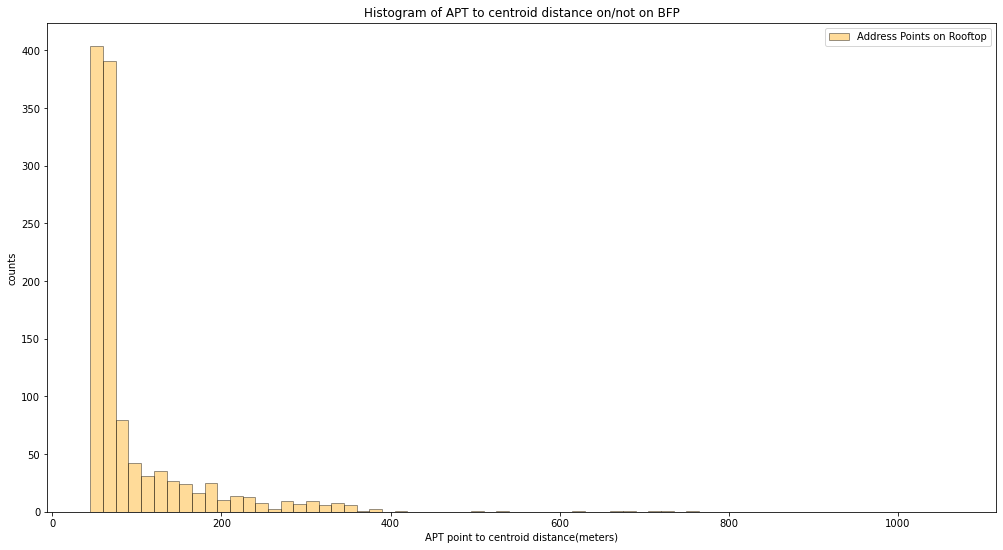

3452

In [15]:
fig, ax = plt.subplots(figsize=(17,9))

ax.set_title("Histogram of APT to centroid distance on/not on BFP")
ax.set_xlabel("APT point to centroid distance(meters)")
ax.set_ylabel("counts")

frqTrue, edgesTrue = np.histogram(processed_df_co['APT_to_Centroid_distance'].loc[processed_df_co['APT_to_Centroid_distance']>50].values, bins = np.arange(45,max_dist,15))
p1 = ax.bar(edgesTrue[:-1], frqTrue, width=np.diff(edgesTrue), edgecolor="black", align="edge",alpha=0.4,label='Address Points on Rooftop',color='orange')

plt.legend()
plt.show()
gc.collect()

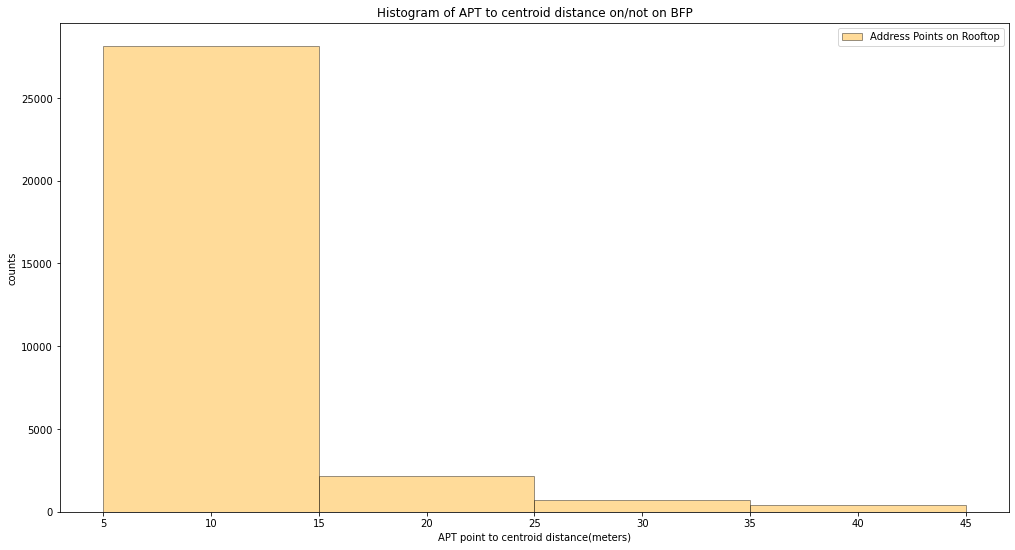

7158

In [16]:
fig, ax = plt.subplots(figsize=(17,9))

ax.set_title("Histogram of APT to centroid distance on/not on BFP")
ax.set_xlabel("APT point to centroid distance(meters)")
ax.set_ylabel("counts")

frqTrue, edgesTrue = np.histogram(processed_df_co['APT_to_Centroid_distance'].loc[processed_df_co['APT_to_Centroid_distance']<50].values, bins = np.arange(5,50,10))
p1 = ax.bar(edgesTrue[:-1], frqTrue, width=np.diff(edgesTrue), edgecolor="black", align="edge",alpha=0.4,label='Address Points on Rooftop',color='orange')

plt.legend()
plt.show()
gc.collect()

In [17]:
df_for_analysis_usa_co_arapahoe = processed_df_co.drop(['APN','FIPS','PRCLDMPID','geometry','building_geometry','building_roi','APT'],axis=1)
df_for_analysis_usa_co_arapahoe.head()

,updated_geometries,feat_id,iso_script,iso_lang_c,postal_cod,house_numb,state_prov,locality,street_nam,country_co,prefix,suffix,predir,postdir,sn_body,APT_to_Centroid_distance,APT_lat,APT_lon,updated_lat,updated_lon
0,POINT (-104.97790 39.65364),00004358-3100-2800-0000-00000003efbe,Latn,ENG,80113,3472,CO,Englewood,S Clarkson St,USA,None,St,S,None,Clarkson,1.2,39.653629,-104.977889,39.653636,-104.977900
1,POINT (-104.97790 39.65347),00004358-3100-2800-0000-00000003efbd,Latn,ENG,80113,3488,CO,Englewood,S Clarkson St,USA,None,St,S,None,Clarkson,1.2,39.653460,-104.977889,39.653465,-104.977902
2,POINT (-104.97789 39.65333),00004358-3100-2800-0000-00000003efbc,Latn,ENG,80113,3490,CO,Englewood,S Clarkson St,USA,None,St,S,None,Clarkson,4.2,39.653288,-104.977892,39.653326,-104.977892
3,POINT (-104.97738 39.65345),00004358-3100-2800-0000-00000003efd5,Latn,ENG,80113,851,CO,Englewood,Hampden Ave,USA,None,Ave,None,None,Hampden,2.6,39.653425,-104.977386,39.653449,-104.977383
4,POINT (-104.97790 39.65377),00004358-3100-2800-0000-00000003efbf,Latn,ENG,80113,3466,CO,Englewood,S Clarkson St,USA,None,St,S,None,Clarkson,1.1,39.653767,-104.977890,39.653774,-104.977899


In [25]:
output_path = os.path.join(data_path,state,city,'Apt_realignment/01_apt_realignment_mapping')

os.makedirs(output_path,exist_ok=True)
print(output_path)
geo_dataframe = gpd.GeoDataFrame(df_for_analysis_usa_co_arapahoe, geometry='updated_geometries', crs="EPSG:4326")
pd_dataframe = pd.DataFrame(geo_dataframe)
pd_dataframe.to_pickle(os.path.join(output_path,"APT_realigned_usa_uco_araphoe.pkl"))

filename = os.path.join(output_path,'APT_realigned_usa_uco_araphoe.shp')
geo_dataframe.to_file(driver='ESRI Shapefile', filename=filename)

/mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/BFP_Analysis_USA/data/data/Colorado/Arapahoe/Apt_realignment/01_apt_realignment_mapping


## Miamidade_Florida

In [1]:
import os
import shapely
import numpy as np
import sys 
import pycoredb 
import pandas as pd 
import gc
from shapely import wkt
from matplotlib import pyplot as plt
from shapely.geometry import Point,mapping,Polygon,box,MultiPoint
import geopandas as gpd 
import seaborn as sns 
 
# for parallelization
sys.path.append('/mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/APT-Realignment/src/apt_realignment')
sys.path.append('/mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/APT-Realignment/src/apt_realignment/utils')
from process_geometries import ProcessGeometricData  as ProcessAPT_data
from utils.haversine_distance import get_distance
from utils.extract_mnr_data import ExtractMNRData as extract_mnr_data


data_path  = "/mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/BFP_Analysis_USA/data/data"
state = "Florida"
city = "Miamidade"

apt_data_path = os.path.join(data_path,state,"APT_2022_06_012_nam_usa_ufl.shp" )
parcel_path = os.path.join(data_path,state,city,"Parcels_12086/Parcels_12086.shp")
building_geojson = os.path.join(data_path,state,'Florida.geojson')

/home/tandon/anaconda3/envs/pygeo/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [27]:
if not os.path.isfile(apt_data_path):
    mnr_database = extract_mnr_data(country_code='_2022_06_009_nam_usa_ufl')
    mnr_database.connect_to_server()
    # out_path = os.path.join(data_path,state)
    # mnr_apt_df = mnr_database.extract_apt_addresses_data()
    # mnr_database.save_dataframe_as_shpfile(mnr_apt_df, out_path, filename='APT_2022_06_009_nam_usa_ufl.shp')

In [ ]:
output_path = os.path.join(data_path,state,city,'Apt_realignment') 

apt_preprocess = ProcessAPT_data(
    parcel_shapefile=parcel_path,
    building_shapefile=building_geojson,
    apt_shape_file=apt_data_path,
    output_path=output_path
    )

processed_df_miamidade = apt_preprocess.process_dataframe(bfp_count_per_parcel=1,filename='APT_realigned_usa_ufl_miamidade')

In [4]:
processed_df_miamidade.head(4)

,APN,FIPS,PRCLDMPID,geometry,building_geometry,building_roi,feat_id,iso_script,iso_lang_c,postal_cod,...,locality,street_nam,country_co,prefix,suffix,predir,postdir,sn_body,APT,updated_geometries
0,3411320142000,12086,100660192_206370610,"POLYGON ((-80.26621 25.97010, -80.26620 25.970...","POLYGON ((-80.26573 25.97029, -80.265967 25.97...","POLYGON ((-80.26610 25.97033, -80.26611 25.970...",00005546-3500-2800-0000-00000078eb03,Latn,ENG,33055,...,Opa Locka,NW 39th Ave,USA,None,Ave,NW,None,39th,POINT (-80.26617400000001 25.9702614),POINT (-80.26611 25.97028)
1,3411320142060,12086,100660192_206370609,"POLYGON ((-80.26672 25.97005, -80.26685 25.970...","POLYGON ((-80.266722 25.97006, -80.266718 25.9...","POLYGON ((-80.26672 25.97006, -80.26672 25.970...",00005546-3500-2800-0000-00000078eb01,Latn,ENG,33055,...,Opa Locka,NW 39th Ave,USA,None,Ave,NW,None,39th,POINT (-80.26674559999999 25.9701337),POINT (-80.26670 25.97014)
2,3411320142050,12086,100660192_206370608,"POLYGON ((-80.26664 25.97004, -80.26672 25.970...","POLYGON ((-80.266722 25.97006, -80.266718 25.9...","POLYGON ((-80.26671 25.97010, -80.26669 25.970...",00005546-3500-2800-0000-00000078eb00,Latn,ENG,33055,...,Opa Locka,NW 39th Ave,USA,None,Ave,NW,None,39th,POINT (-80.2666577 25.9701395),POINT (-80.26666 25.97014)
3,3411320142040,12086,100660192_206370607,"POLYGON ((-80.26656 25.97003, -80.26664 25.970...","POLYGON ((-80.266722 25.97006, -80.266718 25.9...","POLYGON ((-80.26663 25.97009, -80.26661 25.970...",00005546-3500-2800-0000-00000078eaff,Latn,ENG,33055,...,Opa Locka,NW 39th Ave,USA,None,Ave,NW,None,39th,POINT (-80.2665928 25.9701919),POINT (-80.26661 25.97013)


In [5]:
def get_apt_to_bfp_distance(data):
    anchor_point = data['APT']
    bfp_centroid = data['updated_geometries']
    return get_distance(anchor_point, bfp_centroid)

processed_df_miamidade['APT_to_Centroid_distance'] = processed_df_miamidade.apply(lambda x: get_apt_to_bfp_distance(x),axis=1)
processed_df_miamidade['APT_lat'] = processed_df_miamidade['APT'].apply(lambda z: z.y)
processed_df_miamidade['APT_long'] = processed_df_miamidade['APT'].apply(lambda z: z.x)

processed_df_miamidade['updated_lat'] = processed_df_miamidade['updated_geometries'].apply(lambda z: z.y)
processed_df_miamidade['updated_lon'] = processed_df_miamidade['updated_geometries'].apply(lambda z: z.x)
processed_df_miamidade.head()

,APN,FIPS,PRCLDMPID,geometry,building_geometry,building_roi,feat_id,iso_script,iso_lang_c,postal_cod,...,predir,postdir,sn_body,APT,updated_geometries,APT_to_Centroid_distance,APT_lat,APT_long,updated_lat,updated_lon
0,3411320142000,12086,100660192_206370610,"POLYGON ((-80.26621 25.97010, -80.26620 25.970...","POLYGON ((-80.26573 25.97029, -80.265967 25.97...","POLYGON ((-80.26610 25.97033, -80.26611 25.970...",00005546-3500-2800-0000-00000078eb03,Latn,ENG,33055,...,NW,None,39th,POINT (-80.26617400000001 25.9702614),POINT (-80.26611 25.97028),6.8,25.970261,-80.266174,25.970280,-80.266109
1,3411320142060,12086,100660192_206370609,"POLYGON ((-80.26672 25.97005, -80.26685 25.970...","POLYGON ((-80.266722 25.97006, -80.266718 25.9...","POLYGON ((-80.26672 25.97006, -80.26672 25.970...",00005546-3500-2800-0000-00000078eb01,Latn,ENG,33055,...,NW,None,39th,POINT (-80.26674559999999 25.9701337),POINT (-80.26670 25.97014),4.4,25.970134,-80.266746,25.970136,-80.266701
2,3411320142050,12086,100660192_206370608,"POLYGON ((-80.26664 25.97004, -80.26672 25.970...","POLYGON ((-80.266722 25.97006, -80.266718 25.9...","POLYGON ((-80.26671 25.97010, -80.26669 25.970...",00005546-3500-2800-0000-00000078eb00,Latn,ENG,33055,...,NW,None,39th,POINT (-80.2666577 25.9701395),POINT (-80.26666 25.97014),0.4,25.970139,-80.266658,25.970141,-80.266662
3,3411320142040,12086,100660192_206370607,"POLYGON ((-80.26656 25.97003, -80.26664 25.970...","POLYGON ((-80.266722 25.97006, -80.266718 25.9...","POLYGON ((-80.26663 25.97009, -80.26661 25.970...",00005546-3500-2800-0000-00000078eaff,Latn,ENG,33055,...,NW,None,39th,POINT (-80.2665928 25.9701919),POINT (-80.26661 25.97013),6.7,25.970192,-80.266593,25.970133,-80.266610
5,3411320141380,12086,100660192_206370605,"POLYGON ((-80.26739 25.96993, -80.26740 25.970...","POLYGON ((-80.26718 25.970002, -80.26718200000...","POLYGON ((-80.26738 25.97007, -80.26718 25.970...",00005546-3500-2800-0000-00000057a884,Latn,ENG,33055,...,NW,None,40th Circle,POINT (-80.267262 25.97001),POINT (-80.26728 25.97004),3.4,25.970010,-80.267262,25.970037,-80.267279


In [6]:
distance_greater_than_50m = processed_df_miamidade.loc[processed_df_miamidade['APT_to_Centroid_distance']>50].shape[0]
max_dist = processed_df_miamidade['APT_to_Centroid_distance'].loc[processed_df_miamidade['APT_to_Centroid_distance']>50].max()
print("Max distance APT from Parcel to Building Centroid {:.2f} m".format(processed_df_miamidade['APT_to_Centroid_distance'].loc[processed_df_miamidade['APT_to_Centroid_distance']>50].max()))
print("Data points greater than 50m: {:.2f}% ".format(100*(distance_greater_than_50m/processed_df_miamidade.shape[0])))

Max distance APT from Parcel to Building Centroid 1368.90 m
Data points greater than 50m: 1.27% 


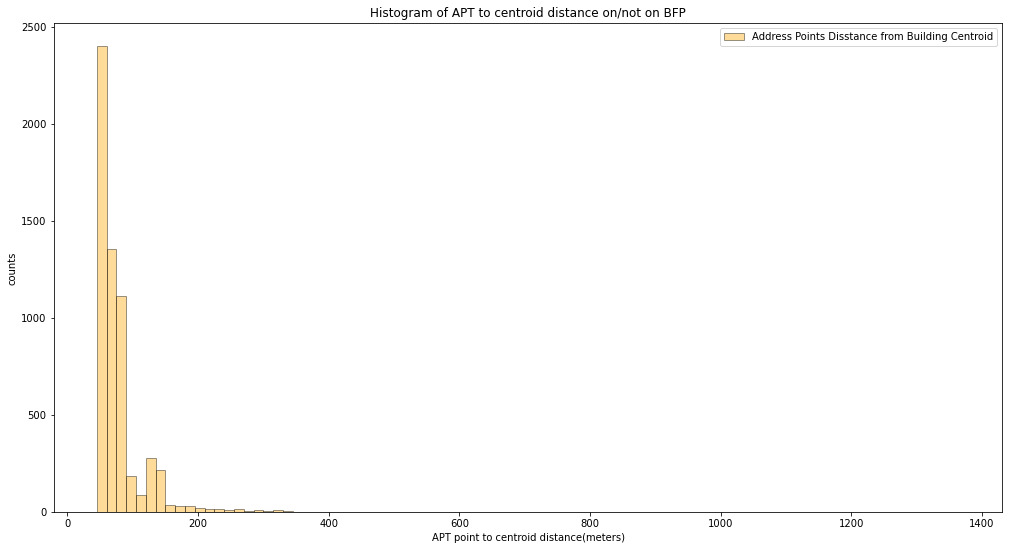

6

In [7]:
fig, ax = plt.subplots(figsize=(17,9))

ax.set_title("Histogram of APT to centroid distance on/not on BFP")
ax.set_xlabel("APT point to centroid distance(meters)")
ax.set_ylabel("counts")

frqTrue, edgesTrue = np.histogram(processed_df_miamidade['APT_to_Centroid_distance'].loc[processed_df_miamidade['APT_to_Centroid_distance']>=50].values, bins = np.arange(45,max_dist,15))
p1 = ax.bar(edgesTrue[:-1], frqTrue, width=np.diff(edgesTrue), edgecolor="black", align="edge",alpha=0.4,label='Address Points Disstance from Building Centroid',color='orange')

plt.legend()
plt.show()
gc.collect()

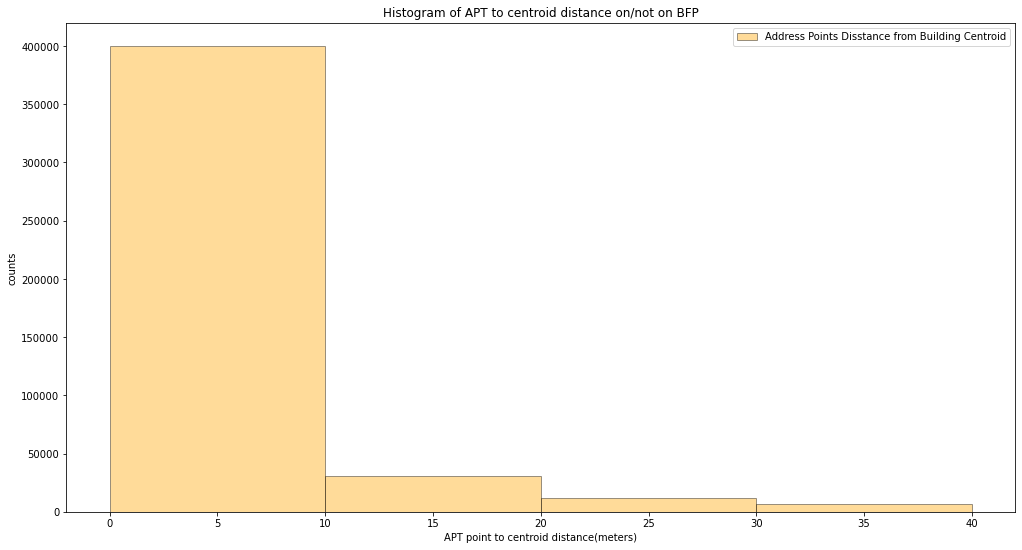

8237

In [8]:
fig, ax = plt.subplots(figsize=(17,9))

ax.set_title("Histogram of APT to centroid distance on/not on BFP")
ax.set_xlabel("APT point to centroid distance(meters)")
ax.set_ylabel("counts")

frqTrue, edgesTrue = np.histogram(processed_df_miamidade['APT_to_Centroid_distance'].loc[processed_df_miamidade['APT_to_Centroid_distance']<50].values, bins = np.arange(0,50,10))
p1 = ax.bar(edgesTrue[:-1], frqTrue, width=np.diff(edgesTrue), edgecolor="black", align="edge",alpha=0.4,label='Address Points Disstance from Building Centroid',color='orange')

plt.legend()
plt.show()
gc.collect()

In [33]:
df_for_analysis_usa_fl = processed_df_miamidade.drop(['APN','FIPS','PRCLDMPID','geometry','building_geometry','building_roi','APT'],axis=1)
df_for_analysis_usa_fl.head()

,updated_geometries,feat_id,iso_script,iso_lang_c,postal_cod,house_numb,state_prov,locality,street_nam,country_co,prefix,suffix,predir,postdir,sn_body,APT_to_Centroid_distance,APT_lat,APT_long,updated_lat,updated_lon
0,POINT (-80.26611 25.97028),00005546-3500-2800-0000-00000078eb03,Latn,ENG,33055,21369,FL,Opa Locka,NW 39th Ave,USA,None,Ave,NW,None,39th,6.8,25.970261,-80.266174,25.970280,-80.266109
1,POINT (-80.26670 25.97014),00005546-3500-2800-0000-00000078eb01,Latn,ENG,33055,21343,FL,Opa Locka,NW 39th Ave,USA,None,Ave,NW,None,39th,4.4,25.970134,-80.266746,25.970136,-80.266701
2,POINT (-80.26666 25.97014),00005546-3500-2800-0000-00000078eb00,Latn,ENG,33055,21341,FL,Opa Locka,NW 39th Ave,USA,None,Ave,NW,None,39th,0.4,25.970139,-80.266658,25.970141,-80.266662
3,POINT (-80.26661 25.97013),00005546-3500-2800-0000-00000078eaff,Latn,ENG,33055,21339,FL,Opa Locka,NW 39th Ave,USA,None,Ave,NW,None,39th,6.7,25.970192,-80.266593,25.970133,-80.266610
5,POINT (-80.26728 25.97004),00005546-3500-2800-0000-00000057a884,Latn,ENG,33055,21475,FL,Opa Locka,NW 40th Circle Ct,USA,None,Ct,NW,None,40th Circle,3.4,25.970010,-80.267262,25.970037,-80.267279


In [34]:
# output_path = os.path.join(data_path,state,city,'Apt_realignment/01_apt_realignment_mapping')
# print(output_path)
# os.makedirs(output_path,exist_ok=True)

# filename = os.path.join(output_path,'APT_realigned_usa_ufl_miamidade')
# geo_dataframe = gpd.GeoDataFrame(df_for_analysis_usa_fl, geometry='updated_geometries', crs="EPSG:4326")
# pd_dataframe = pd.DataFrame(geo_dataframe)

# pd_dataframe.to_pickle(filename+".pkl")
# geo_dataframe.to_file(driver='ESRI Shapefile', filename=filename+".shp")


/mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/BFP_Analysis_USA/data/data/Florida/Miamidade/Apt_realignment/01_apt_realignment_mapping


## Duval_Florida

In [1]:
import os
import shapely
import numpy as np
import sys 
import pycoredb 
import pandas as pd 
import gc
from shapely import wkt
from matplotlib import pyplot as plt
from shapely.geometry import Point,mapping,Polygon,box,MultiPoint
import geopandas as gpd 
import seaborn as sns 
 
# for parallelization
sys.path.append('/mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/APT-Realignment/src/apt_realignment')
from process_geometries import ProcessGeometricData  as ProcessAPT_data
from utils.haversine_distance import get_distance

data_path  = "/mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/BFP_Analysis_USA/data/data/"
state = "Florida"
city = "Duval"
apt_data_path = os.path.join(data_path,state,"APT_2022_06_012_nam_usa_ufl.shp" )
parcel_path = os.path.join(data_path,state,city,"Parcels_12031/Parcels_12031.shp")
building_geojson = os.path.join(data_path,state,'Florida.geojson')

/home/tandon/anaconda3/envs/pygeo/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
output_path = os.path.join(data_path,state,city,'Apt_realignment') 

apt_preprocess = ProcessAPT_data(
                        parcel_shapefile=parcel_path,
                        building_shapefile=building_geojson,
                        apt_shape_file=apt_data_path,output_path=output_path
                        )

processed_df_duval = apt_preprocess.process_dataframe(bfp_count_per_parcel=1,filename='APT_realigned_nam_usa_ufl_duval')
processed_df_duval.head(4)

2022-08-19 11:15:04,893:INFO:- Processing APT's with 1 BFP-Count Per Parcel
2022-08-19 11:15:04,895:INFO:- Processing Land Parcel data and Building Footprints 
2022-08-19 11:21:47,378:INFO:- Acquiring BFP's within land Parcels 
2022-08-19 11:21:47,778:INFO:- Processing Anchor-Points data over Parcel-Building Geo-Dataframe
2022-08-19 11:35:16,245:INFO:- Process Completed ...
2022-08-19 11:35:41,718:INFO:- saving Realigned matrix..
2022-08-19 11:35:43,715:INFO:- File saved at /mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/BFP_Analysis_USA/data/data/Florida/Duval/Apt_realignment/APT_realign_1_bfp2parcel/APT_realigned_nam_usa_ufl_duval.pkl


,feat_id,iso_script,iso_lang_c,postal_cod,house_numb,state_prov,locality,street_nam,country_co,prefix,suffix,predir,postdir,sn_body,geometry,PRCLDMPID,updated_geometries,updated_lat,updated_lon
1,00005546-3100-2800-0000-000000072912,Latn,ENG,32218,16050,FL,Jacksonville,Ressie Dr W,USA,None,Dr,None,W,Ressie,"POLYGON ((-81.74024 30.52834, -81.74049 30.528...",100660192_22021635,POINT (-81.73960 30.52901),30.529010,-81.739601
3,00005546-3100-2800-0000-00000007290c,Latn,ENG,32218,16066,FL,Jacksonville,Puskita Trl,USA,None,Trl,None,None,Puskita,"POLYGON ((-81.74387 30.52774, -81.74422 30.528...",100660192_22021627,POINT (-81.74362 30.52812),30.528118,-81.743616
4,00005546-3100-2800-0000-00000007290d,Latn,ENG,32218,16070,FL,Jacksonville,Puskita Trl,USA,None,Trl,None,None,Puskita,"POLYGON ((-81.74422 30.52813, -81.74450 30.528...",100660192_22021626,POINT (-81.74390 30.52846),30.528461,-81.743900
5,00005546-3100-2800-0000-000000072936,Latn,ENG,32218,16055,FL,Jacksonville,Ressie Dr W,USA,None,Dr,None,W,Ressie,"POLYGON ((-81.73911 30.52914, -81.73947 30.529...",100660192_22021625,POINT (-81.73908 30.52952),30.529523,-81.739082


In [ ]:
def get_apt_to_bfp_distance(data):
    anchor_point = data['APT']
    bfp_centroid = data['updated_geometries']
    return get_distance(anchor_point, bfp_centroid)

processed_df_duval['APT_to_Centroid_distance'] = processed_df_duval.apply(lambda x: get_apt_to_bfp_distance(x),axis=1)

processed_df_duval['APT_lat'] = processed_df_duval['APT'].apply(lambda z: z.y)
processed_df_duval['APT_long'] = processed_df_duval['APT'].apply(lambda z: z.x)

processed_df_duval['updated_lat'] = processed_df_duval['updated_geometries'].apply(lambda z: z.y)
processed_df_duval['updated_long'] = processed_df_duval['updated_geometries'].apply(lambda z: z.x)

processed_df_duval.head()

In [ ]:
distance_greater_than_50m = processed_df_duval.loc[processed_df_duval['APT_to_Centroid_distance']>50].shape[0]
max_dist = processed_df_duval['APT_to_Centroid_distance'].loc[processed_df_duval['APT_to_Centroid_distance']>50].max()
print("Max distance APT from Parcel to Building Centroid {:.2f} m".format(processed_df_duval['APT_to_Centroid_distance'].loc[processed_df_duval['APT_to_Centroid_distance']>50].max()))
print("Data points greater than 50m: {:.2f}%".format(100*(distance_greater_than_50m/processed_df_duval.shape[0])))

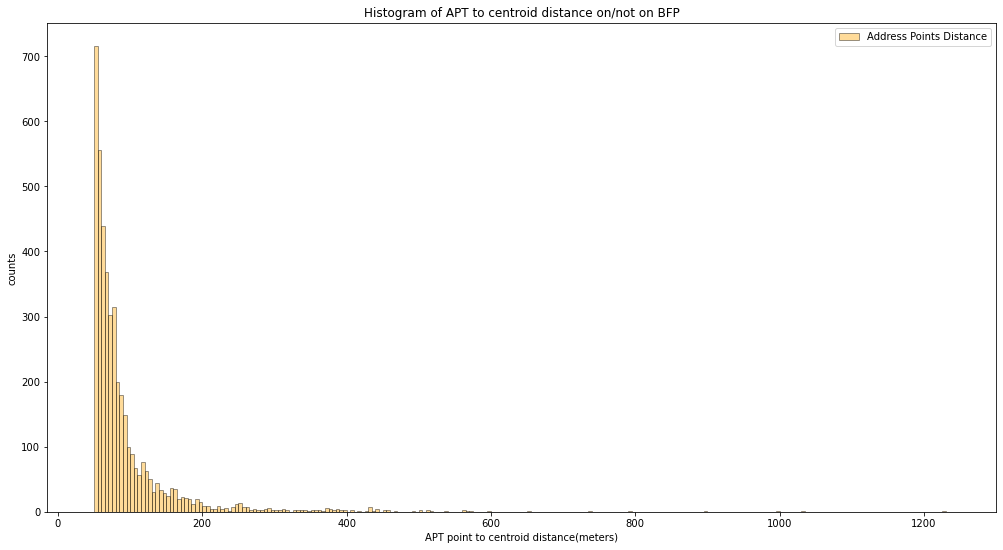

3693

In [39]:
fig, ax = plt.subplots(figsize=(17,9))

ax.set_title("Histogram of APT to centroid distance on/not on BFP")
ax.set_xlabel("APT point to centroid distance(meters)")
ax.set_ylabel("counts")

frqTrue, edgesTrue = np.histogram(processed_df_duval['APT_to_Centroid_distance'].loc[processed_df_duval['APT_to_Centroid_distance']>=50].values, bins = np.arange(45,max_dist,5))
p1 = ax.bar(edgesTrue[:-1], frqTrue, width=np.diff(edgesTrue), edgecolor="black", align="edge",alpha=0.4,label='Address Points Distance',color='orange')

plt.legend()
plt.show()
gc.collect()

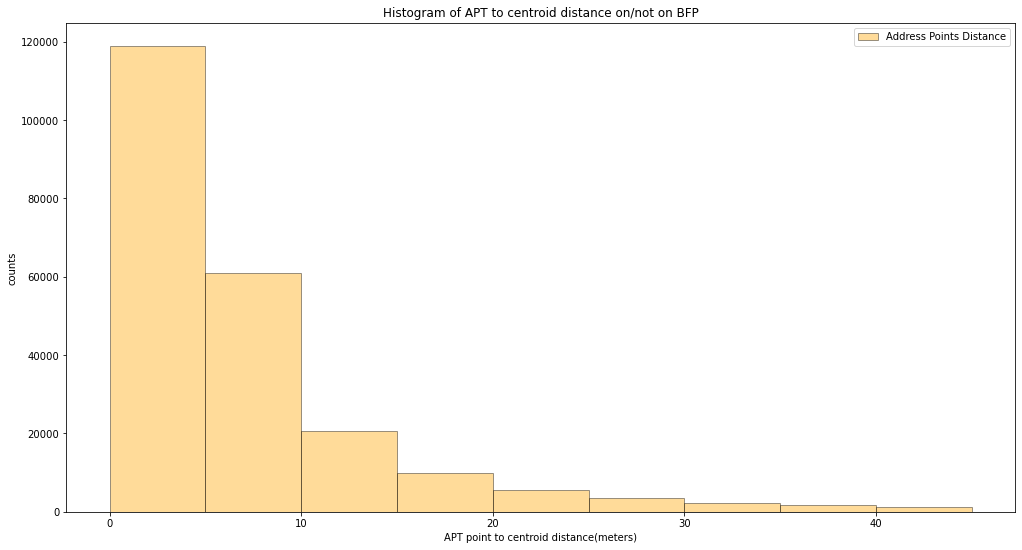

17076

In [40]:
fig, ax = plt.subplots(figsize=(17,9))

ax.set_title("Histogram of APT to centroid distance on/not on BFP")
ax.set_xlabel("APT point to centroid distance(meters)")
ax.set_ylabel("counts")

frqTrue, edgesTrue = np.histogram(processed_df_duval['APT_to_Centroid_distance'].loc[processed_df_duval['APT_to_Centroid_distance']<50].values, bins = np.arange(0,50,5))
p1 = ax.bar(edgesTrue[:-1], frqTrue, width=np.diff(edgesTrue), edgecolor="black", align="edge",alpha=0.4,label='Address Points Distance',color='orange')

plt.legend()
plt.show()
gc.collect()

In [ ]:
df_for_analysis_usa_duval = processed_df_duval.drop(['APN','FIPS','PRCLDMPID','geometry','building_geometry','building_roi','APT'],axis=1)
df_for_analysis_usa_duval.head()

In [42]:
# output_path = os.path.join(data_path,state,city,'Apt_realignment/01_apt_realignment_mapping') 
# os.makedirs(output_path,exist_ok=True)

# geo_dataframe = gpd.GeoDataFrame(df_for_analysis_usa_duval, geometry='updated_geometries', crs="EPSG:4326")
# pd_dataframe = pd.DataFrame(geo_dataframe)
# filename = os.path.join(output_path,'APT_realigned_2022_06_009_nam_usa_ufl_duval')

# pd_dataframe.to_pickle(filename+'.pkl')
# geo_dataframe.to_file(driver='ESRI Shapefile', filename=filename+'.shp')


## Harris Texas

In [1]:
import os
import shapely
import numpy as np
import sys 
import pycoredb 
import pandas as pd 
import gc
from shapely import wkt
from matplotlib import pyplot as plt
from shapely.geometry import Point,mapping,Polygon,box,MultiPoint
import geopandas as gpd 
import seaborn as sns 
 
# for parallelization
sys.path.append('/mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/APT-Realignment/src/apt_realignment')
from process_geometries import ProcessGeometricData  as ProcessAPT_data
from utils.haversine_distance import get_distance

data_path  = "/mnt/c/Users/tandon/OneDrive - TomTom/Desktop/tomtom/Workspace/01_Rooftop_accuracy/BFP_Analysis_USA/data/data"
state = "Texas"
city = "Harris"
apt_data_path = os.path.join(data_path,state,"APT_2022_06_012_nam_usa_utx.shp" )
parcel_path = os.path.join(data_path,state,city,"Parcels_48201/Parcels_48201.shp")
building_geojson = os.path.join(data_path,state,'Texas.geojson')

/home/tandon/anaconda3/envs/pygeo/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [47]:
if not os.path.isfile(apt_data_path):
    print("downloading .. ")
    mnr_database = extract_mnr_data(country_code='_2022_06_009_nam_usa_ugx')
    mnr_database.connect_to_server()

    out_path = os.path.join(data_path,state)
    # mnr_apt_df = mnr_database.extract_apt_addresses_data()
    # mnr_database.save_dataframe_as_shpfile(mnr_apt_df, out_path, filename='APT_2022_06_009_nam_usa_ugx.shp')

In [ ]:
output_path = os.path.join(data_path,state,city,'Apt_realignment') 
apt_preprocess = ProcessAPT_data(parcel_shapefile=parcel_path,
                building_shapefile=building_geojson,
                apt_shape_file=apt_data_path , 
                output_path=output_path)

if not os.path.isfile(os.path.join(output_path,'APT_realigned_usa_utx_Harris.pkl')):
    processed_df_harris = apt_preprocess.process_dataframe(bfp_count_per_parcel=1,filename='APT_realigned_usa_utx_Harris')
    processed_df_harris.head(10)

In [6]:
processed_df = pd.read_pickle(os.path.join(output_path,'APT_realign_1_bfp2parcel/APT_realigned_usa_utx_Harris.pkl'))
processed_df.head()

,feat_id,iso_script,iso_lang_c,postal_cod,house_numb,state_prov,locality,street_nam,country_co,prefix,suffix,predir,postdir,sn_body,geometry,PRCLDMPID,APT_lat,APT_lon,updated_geometries
2,00005554-3500-2800-0000-000000f651bd,Latn,ENG,77484,20520,TX,Waller,Stokes Rd,USA,None,Rd,None,None,Stokes,"POLYGON ((-95.90885 30.07116, -95.90887 30.071...",512482743_10,30.071253,-95.906471,POINT (-95.90843 30.07146)
3,00005554-3500-2800-0000-000000f651bd,Latn,ENG,77484,20520,TX,Waller,Stokes Rd,USA,None,Rd,None,None,Stokes,"POLYGON ((-95.90885 30.07116, -95.90887 30.071...",512482743_9,30.071253,-95.906471,POINT (-95.90843 30.07146)
4,c9321b9f-1ba2-4190-8756-253a2bf07ca8,Latn,ENG,77484,20550,TX,Waller,Stokes Rd,USA,None,Rd,None,None,Stokes,"POLYGON ((-95.90595 30.07028, -95.90634 30.071...",512482743_8,30.071400,-95.905479,POINT (-95.90834 30.07206)
5,c9321b9f-1ba2-4190-8756-253a2bf07ca8,Latn,ENG,77484,20550,TX,Waller,Stokes Rd,USA,None,Rd,None,None,Stokes,"POLYGON ((-95.90595 30.07028, -95.90634 30.071...",512482743_7,30.071400,-95.905479,POINT (-95.90834 30.07206)
16,00005554-3500-2800-0000-000000f054e5,Latn,ENG,77484,23321,TX,Waller,Kickapoo Rd,USA,None,Rd,None,None,Kickapoo,"POLYGON ((-95.88178 30.11387, -95.88188 30.121...",100660192_219098542,30.117724,-95.880273,POINT (-95.87934 30.11551)


In [ ]:
def get_apt_to_bfp_distance(data):
    anchor_point = data['APT']
    bfp_centroid = data['updated_geometries']
    return get_distance(anchor_point, bfp_centroid)

processed_df_harris['APT_to_Centroid_distance'] = processed_df_harris.apply(lambda x: get_apt_to_bfp_distance(x),axis=1)

# processed_df_harris['APT_lat'] = processed_df_harris['APT'].apply(lambda z: z.y)
# processed_df_harris['APT_lon'] = processed_df_harris['APT'].apply(lambda z: z.x)

# processed_df_harris['updated_lat'] = processed_df_harris['updated_geometries'].apply(lambda z: z.y)
# processed_df_harris['updated_lon'] = processed_df_harris['updated_geometries'].apply(lambda z: z.x)

processed_df_harris.head()

In [ ]:
distance_greater_than_50m = processed_df_harris.loc[processed_df_harris['APT_to_Centroid_distance']>50].shape[0]
print("Data points greater than 50m: {:.2f}%".format(100*(distance_greater_than_50m/processed_df_harris.shape[0])))

In [ ]:
fig, ax = plt.subplots(figsize=(17,9))

ax.set_title("Histogram of APT to centroid distance on/not on BFP")
ax.set_xlabel("APT point to centroid distance(meters)")
ax.set_ylabel("counts")

frqTrue, edgesTrue = np.histogram(processed_df_harris['APT_to_Centroid_distance'].loc[processed_df_harris['APT_to_Centroid_distance']>50].values, bins = np.arange(45,250,5))
p1 = ax.bar(edgesTrue[:-1], frqTrue, width=np.diff(edgesTrue), edgecolor="black", align="edge",alpha=0.4,label='Address Points on Rooftop',color='orange')

plt.legend()
plt.show()
gc.collect()

In [ ]:
print(processed_df_harris.shape)
processed_df_harris[['updated_geometries','feat_id','postal_cod','house_numb','state_prov','locality','street_nam','country_co','prefix','suffix',
	                'predir','postdir','sn_body','APT_to_Centroid_distance','APT_lat','APT_lon','updated_lat',	'updated_lon']].head()

In [ ]:
output_path = os.path.join(data_path,state,city,'Apt_realignment') 
if not os.path.isdir(output_path):
    os.makedirs(output_path,exist_ok=True)

df_for_analysis_usa_harris = processed_df_harris.drop(['APN','FIPS','PRCLDMPID','geometry','building_geometry','building_roi','APT'],axis=1)

fname = os.path.join(output_path,"APT_realigned_usa_utx_Harris")
geo_dataframe = gpd.GeoDataFrame(df_for_analysis_usa_harris, geometry='updated_geometries', crs="EPSG:4326")
pd_dataframe = pd.DataFrame(geo_dataframe)

pd_dataframe.to_pickle(fname+'.pkl')
geo_dataframe.to_file(driver='ESRI Shapefile', filename=fname+'.shp')

